In [1]:
from typing import Annotated

DataList = Annotated[list[float], 49]

fish_length: DataList = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight: DataList = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
# for문을 쓰지 않고 numpy를 이용한다.
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight)) # 세로로 정렬해서 옆으로 철썩
print(fish_data[:5])

# np.ones(N) => [1, 1, 1, 1, ..., 1] 1이 N개
fish_target = np.concatenate((np.ones(35), np.zeros(14))) # 그냥 옆으로 붙이기
print(fish_target)

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target #, random_state=42
)

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

print(test_target) # 샘플링 편향이 나타남. 빙어(0)가 조금 적음.

# 그러나 클래스 비율에 맞게 데이터를 나누자.
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target #, random_state=42
)

print(test_target)

(36, 2) (13, 2)
(36,) (13,)
[1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.]
[1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.]


In [7]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

# 도미(1) 데이터 [25, 150]을 넣어보자
print(kn.predict([[25, 150]])) # 근데 0 나옴

[0.]


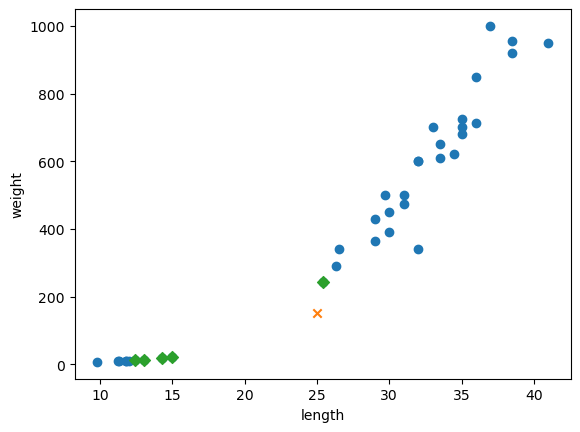

In [12]:
import matplotlib.pyplot as plt

distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='x')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

데이터의 X축과 Y축 비율이 달라서 저렇게 예측한 거임! `plt.xlim((0, 1000))`을 써보면 앎.\
두 특성의 스케일(scale)이 다르므로 저게 문제가 된 것이다.\
특정 값을 일정한 기준으로 맞춰주는 **데이터 전처리**가 중요한 이유.

[ 27.02777778 436.50277778] [  9.75863182 319.43434683]


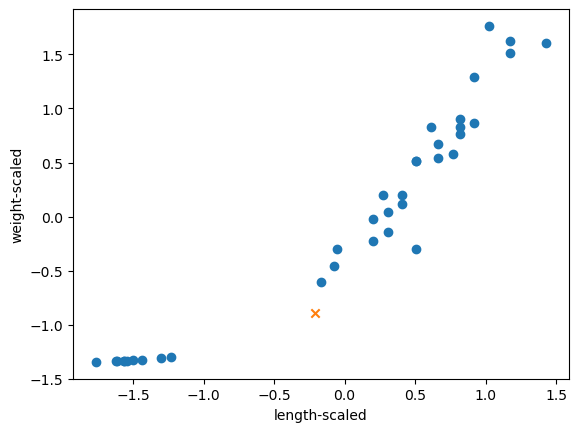

In [13]:
# 표준점수(standard score, z-score)를 사용해보자
# 표준편차의 몇 배만큼 떨어져있나 보는 것.

mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0) # axis=0 : 세로방향 down, axis=1 : 가로방향 right

print(mean, std)

train_scaled = (train_input - mean) / std # 각각의 행에 대해 연산
new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='x')
plt.xlabel('length-scaled')
plt.ylabel('weight-scaled')
plt.show()

1.0
[1.]


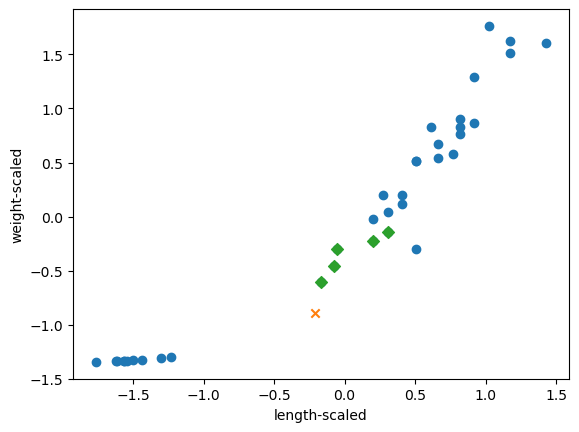

In [15]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
print(kn.score(test_scaled, test_target))
print(kn.predict([new]))

distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='x')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length-scaled')
plt.ylabel('weight-scaled')
plt.show()